In [1]:
!python --version

Python 3.10.9


In [2]:
import matplotlib.pyplot as plt
import numpy             as np
import os

# Experimental data

A significant part of the project is based on experimental data. The same post-treatment apply on both numerical simulation made with ADELI and on images obtained empirically. So it is a second entry point before running the post-processing procedure. For instance, a typical file of such data is stored here.

In [3]:
basepath  = os.path.join("C:\\Users", "julie", "Documents")
expfolder = "experiences"
fieldpath   = os.path.join(basepath, expfolder, "S18_Eyy_point679.csv")

# Reading the file

In [4]:
field = np.genfromtxt( fieldpath, delimiter=',' )

print(f"shape : {field.shape}")
print(f"type  : {field.dtype}")
print(f"NaN   : {np.any(np.isnan(field))}")
print(f"min   : {np.nanmin(field)}")
print(f"max   : {np.nanmax(field)}")
print(f"mean  : {np.nanmean(field)}")
print(f"std   : {np.nanstd(field)}")

shape : (1551, 211)
type  : float64
NaN   : True
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.009779571056074209
std   : 0.016349865239292535


# Exploration

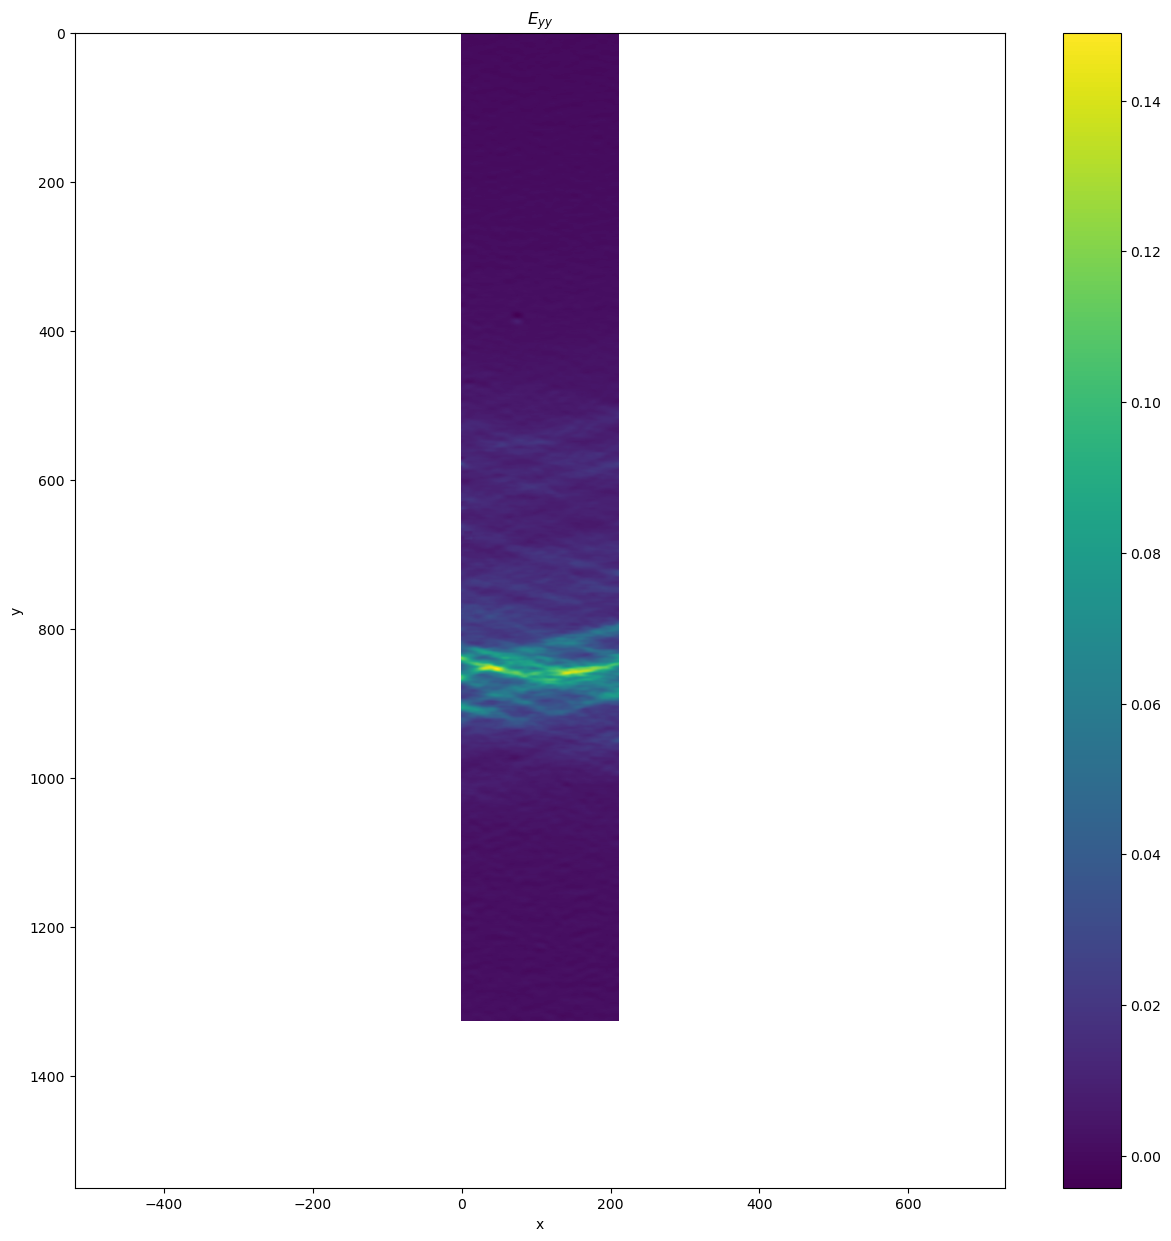

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(field)
plt.axis('equal')
plt.colorbar()
plt.title("$E_{yy}$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Cleaning data

We explore two ways to clean the data :

- `clean0` : get rid of NaNs, the last lines,
- `clean1` : filling NaNs with the mean value of the field

In [6]:
clean0 = field[np.logical_not(np.isnan(field).any(axis=1))]

print(f"shape : {clean0.shape}")
print(f"type  : {clean0.dtype}")
print(f"NaN   : {np.any(np.isnan(clean0))}")
print(f"min   : {np.nanmin(clean0)}")
print(f"max   : {np.nanmax(clean0)}")
print(f"mean  : {np.nanmean(clean0)}")
print(f"std   : {np.nanstd(clean0)}")

shape : (1328, 211)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.009779571056074209
std   : 0.016349865239292535


In [7]:
clean1 = np.nan_to_num(field, np.nanmean(field))

print(f"shape : {clean1.shape}")
print(f"type  : {clean1.dtype}")
print(f"NaN   : {np.any(np.isnan(clean1))}")
print(f"min   : {np.nanmin(clean1)}")
print(f"max   : {np.nanmax(clean1)}")
print(f"mean  : {np.nanmean(clean1)}")
print(f"std   : {np.nanstd(clean1)}")

shape : (1551, 211)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.008373481858456834
std   : 0.015513137639065817


Let visualise them all.

original shape : (1551, 211)
clean0 shape   : (1328, 211)
clean1 shape   : (1551, 211)


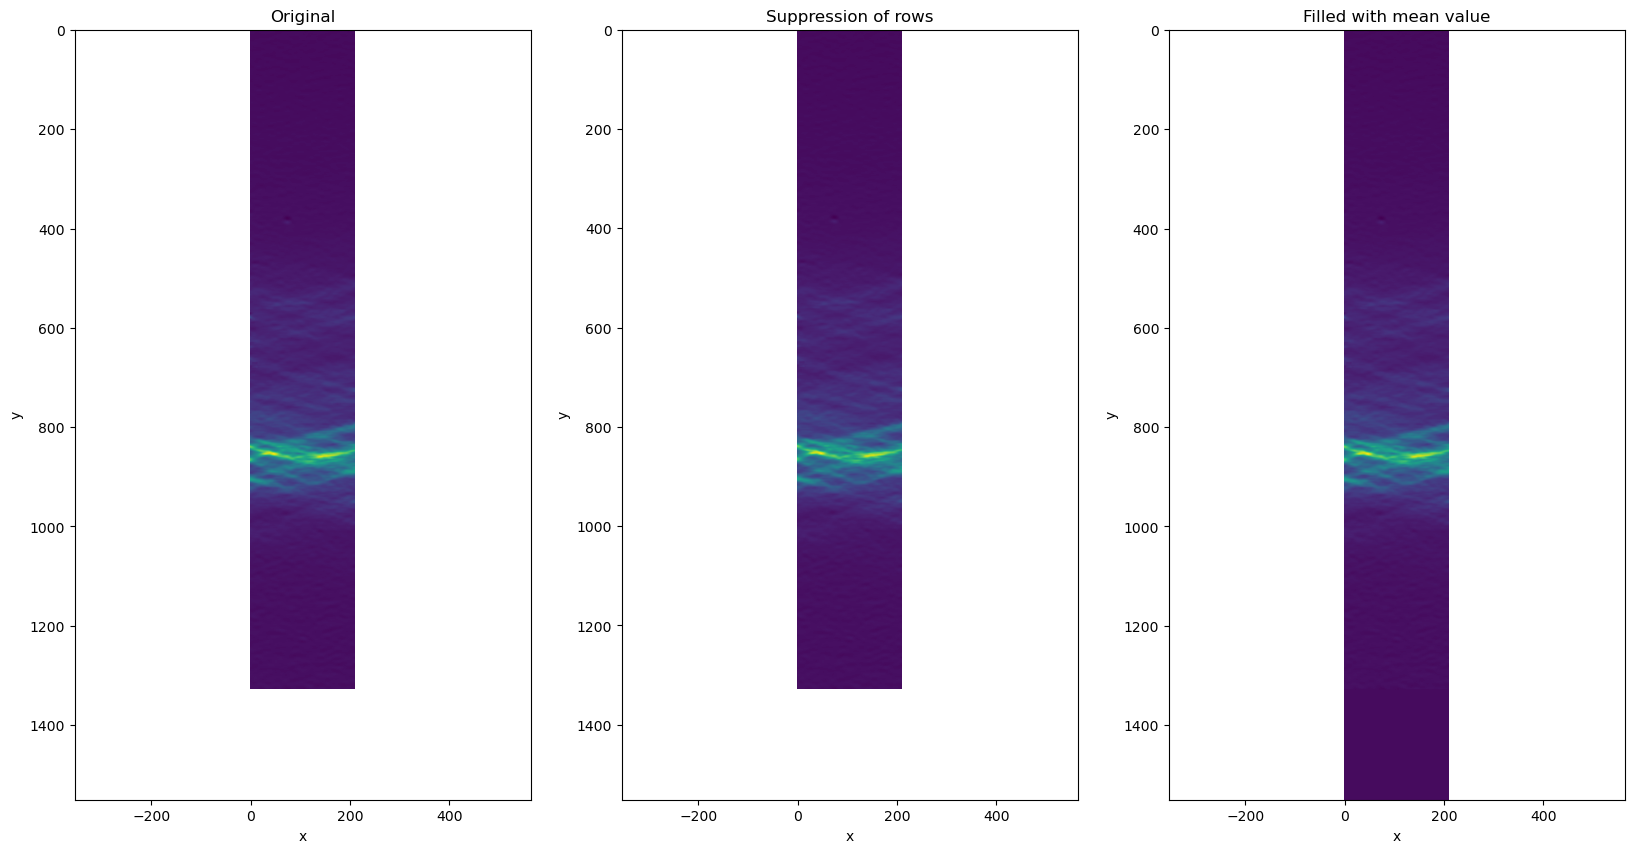

In [8]:
print(f"original shape : {field.shape}")
print(f"clean0 shape   : {clean0.shape}")
print(f"clean1 shape   : {clean1.shape}")

fig = plt.figure(figsize=(20, 10))

axe = fig.add_subplot(1, 3, 1)
axe.imshow(field)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("Original")

axe = fig.add_subplot(1, 3, 2)
axe.imshow(clean0)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_ylim((field.shape[0], 0))
axe.set_title("Suppression of rows")

axe = fig.add_subplot(1, 3, 3)
axe.imshow(clean1)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("Filled with mean value")

plt.show()

In the first : data exist but is NaN, in the second, data does not exist.

# Padding up to a square with the mean value

In [9]:
meanval = np.nanmean(field)

## Padding `clean0` : `pclean0`

In [10]:
l = min(clean0.shape)
N = max(clean0.shape)

pclean0 = np.ones((N,N), dtype=np.float64) *meanval
pclean0[:, (N-l)//2:(N+l)//2] = clean0

## Padding `clean1` : `pclean1`

In [11]:
l = min(clean1.shape)
N = max(clean1.shape)

pclean1 = np.ones((N,N), dtype=np.float64) *meanval
pclean1[:, (N-l)//2:(N+l)//2] = clean1

## Visualisation

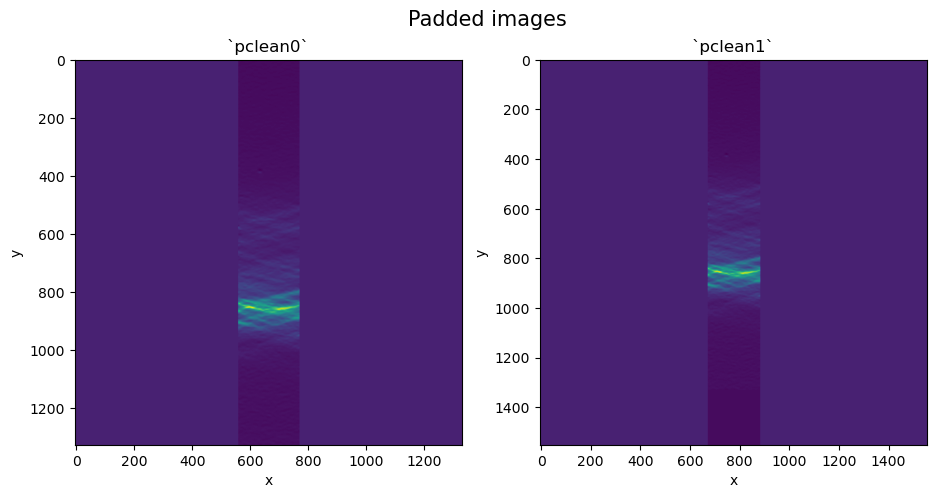

In [12]:
fig = plt.figure(figsize=(11,5))

axe = fig.add_subplot(1, 2, 1)
axe.imshow(pclean0)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`pclean0`")

axe = fig.add_subplot(1, 2, 2)
g = axe.imshow(pclean1)
axe.axis('equal')
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_title("`pclean1`")

plt.suptitle("Padded images", fontsize=15)
plt.show()